In [1]:
import pandas as pd #for working with dataframes
import numpy as np #for linear algebra

In [2]:
import matplotlib.pyplot as plt #all for visualization
%matplotlib inline
import seaborn as sns

In [3]:
path_train = r'C:\Users\berker_ayaz\Files for study\Data\train_bfs.csv'

In [4]:
df_train = pd.read_csv(path_train) #train data
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df_train.shape

(550068, 12)

In [6]:
path_test = r'C:\Users\berker_ayaz\Files for study\Data\test_bfs.csv'

In [7]:
df_test = pd.read_csv(path_test) #test data
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [8]:
df_test.shape

(233599, 11)

In [9]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [10]:
df_test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [11]:
df_train['source'] = 'train' #we are putting this in order to seperate them in the modelling step
df_test['source'] = 'test'

In [12]:
df_final = pd.concat([df_train, df_test], sort = True)
df_final

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID,source
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001,train
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001,train
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001,train
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001,train
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,26-35,B,F,1,15,8,NaN,NaN,P00118942,NaN,4+,1006036,test
233595,26-35,B,F,1,15,5,8.0,NaN,P00254642,NaN,4+,1006036,test
233596,26-35,B,F,1,15,1,5.0,12.0,P00031842,NaN,4+,1006036,test
233597,46-50,C,F,0,1,10,16.0,NaN,P00124742,NaN,4+,1006037,test


In [13]:
df_final.info() #we have missing values and object types to work on  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         783667 non-null  object 
 1   City_Category               783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Marital_Status              783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          537685 non-null  float64
 7   Product_Category_3          237858 non-null  float64
 8   Product_ID                  783667 non-null  object 
 9   Purchase                    550068 non-null  float64
 10  Stay_In_Current_City_Years  783667 non-null  object 
 11  User_ID                     783667 non-null  int64  
 12  source                      783667 non-null  object 
dtypes: float64(3),

In [14]:
df_final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,783667.0,4.097774e-01,0.491793,0.0,0.0,0.0,1.0,1.0
Occupation,783667.0,8.079300e+00,6.522206,0.0,2.0,7.0,14.0,20.0
Product_Category_1,783667.0,5.366196e+00,3.878160,1.0,1.0,5.0,8.0,20.0
Product_Category_2,537685.0,9.844506e+00,5.089093,2.0,5.0,9.0,15.0,18.0
Product_Category_3,237858.0,1.266860e+01,4.125510,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0
User_ID,783667.0,1.003029e+06,1727.266668,1000001.0,1001519.0,1003075.0,1004478.0,1006040.0


In [15]:
df_final.isna().sum() #we have missing values in product category 2 and 3

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
User_ID                            0
source                             0
dtype: int64

In [16]:
for i in df_final.columns: #let's start to work on object types
    print(df_final[i].value_counts())

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64
B    329739
C    243684
A    210244
Name: City_Category, dtype: int64
M    590031
F    193636
Name: Gender, dtype: int64
0    462538
1    321129
Name: Marital_Status, dtype: int64
4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     36122
6      29102
3      25126
10     18304
5      17373
15     17356
11     16593
19     11919
13     11053
18      9367
9       8929
8       2189
Name: Occupation, dtype: int64
5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: Product_Category_1, dtype: int64
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     371

In [17]:
df_final['Age_upd'] = df_final['Age'].map({'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}) 
#mapped age intervals to integers

In [18]:
df_final = df_final.drop('Age', axis=1)

In [19]:
df_final['City_Category_upd'] = df_final['City_Category'].map({'A':1, 'B':2, 'C':3}) #mapped city categories to integers

In [20]:
df_final = df_final.drop('City_Category', axis=1)

In [21]:
df_final['Gender_upd'] = df_final['Gender'].map({'M':0, 'F':1}) #mapped genders to integers

In [22]:
df_final = df_final.drop('Gender', axis=1)

In [23]:
df_final['Stay_In_Current_City_Years'].value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [24]:
def years_stay(years): #changed 4+ into 4 to make it integer
    if years == '4+':
        return 4
    else:
        return int(years)

In [25]:
df_final['Stay_In_Current_City_Years'] = df_final['Stay_In_Current_City_Years'].apply(years_stay)

In [26]:
df_final = df_final.drop(['Product_ID', 'User_ID'], axis=1) 

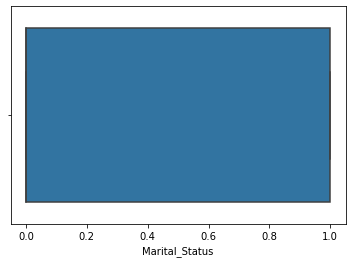

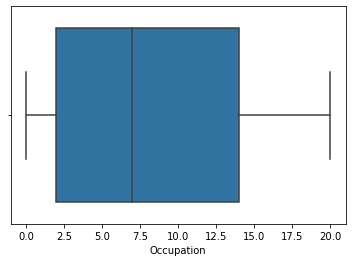

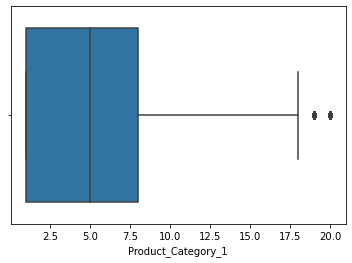

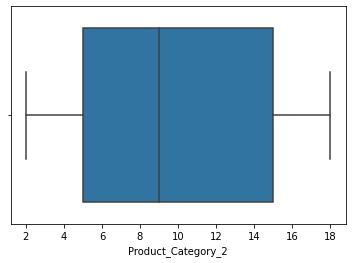

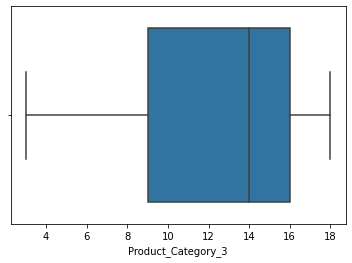

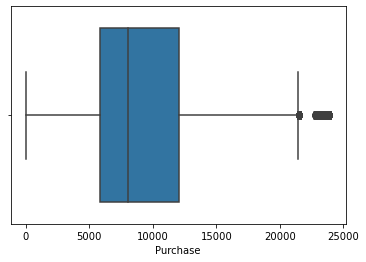

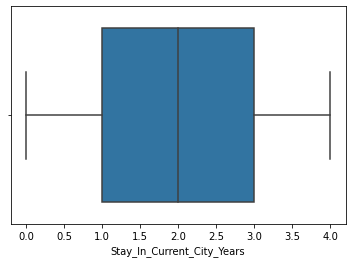

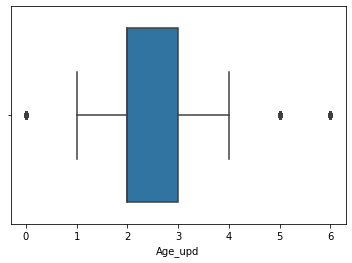

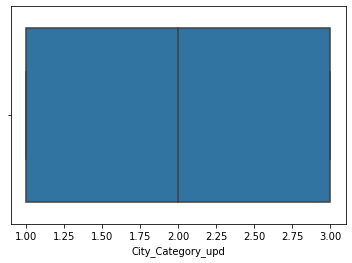

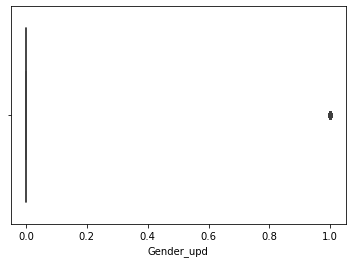

In [27]:
for i in df_final.describe().columns:
    sns.boxplot(df_final[i].dropna())
    plt.show()

In [28]:
df_final['Product_Category_2'].fillna(value=0, inplace=True) #put 0 to NaN values

In [29]:
df_final['Product_Category_3'].fillna(value=0, inplace=True) #put 0 to NaN values

In [30]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Marital_Status              783667 non-null  int64  
 1   Occupation                  783667 non-null  int64  
 2   Product_Category_1          783667 non-null  int64  
 3   Product_Category_2          783667 non-null  float64
 4   Product_Category_3          783667 non-null  float64
 5   Purchase                    550068 non-null  float64
 6   Stay_In_Current_City_Years  783667 non-null  int64  
 7   source                      783667 non-null  object 
 8   Age_upd                     783667 non-null  int64  
 9   City_Category_upd           783667 non-null  int64  
 10  Gender_upd                  783667 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 71.7+ MB


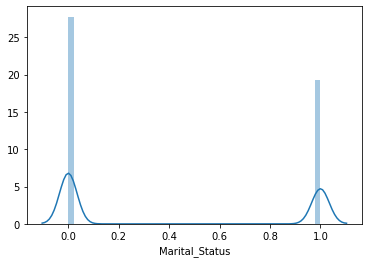

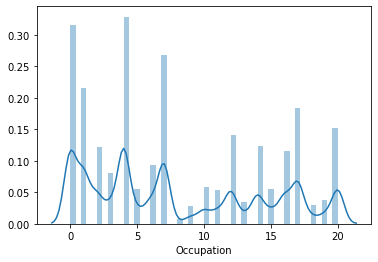

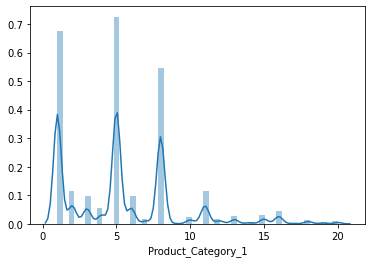

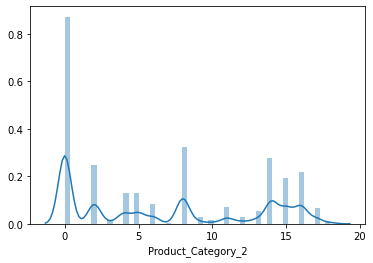

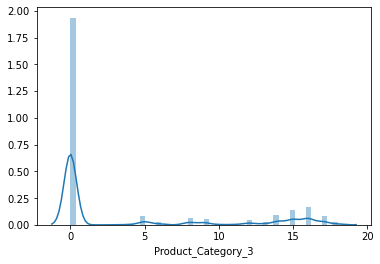

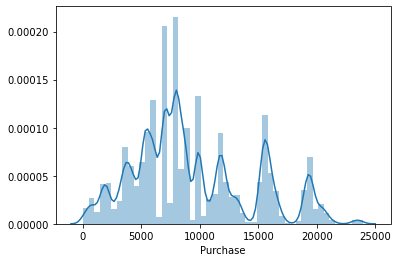

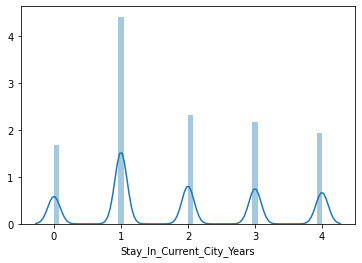

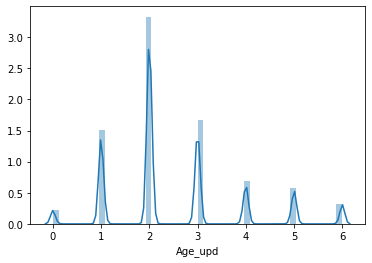

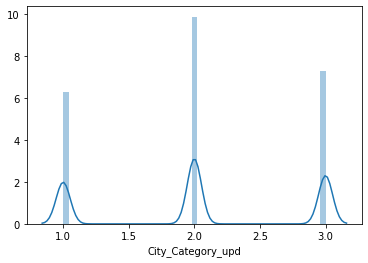

C:\Users\berker_ayaz\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


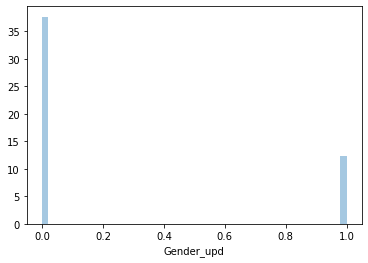

In [31]:
for i in df_final.describe().columns:
    sns.distplot(df_final[i].dropna())
    plt.show()

In [32]:
train = df_final.loc[df_final['source'] == 'train'] #train-test splitting
test = df_final.loc[df_final['source'] == 'test']

In [33]:
train = train.drop(['source'], axis=1)

In [34]:
test = test.drop(['Purchase', 'source'], axis=1)

In [35]:
X_train = train.drop(['Purchase'], axis=1)
y_train = train['Purchase']
X_test = test.copy()

In [36]:
from sklearn.preprocessing import MinMaxScaler #standardization

In [37]:
scaler = MinMaxScaler()

In [38]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
from sklearn.linear_model import LinearRegression #linear regression for model

In [40]:
lm = LinearRegression()

In [41]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
pred = lm.predict(X_test)

In [43]:
pred

array([10528.72908217,  9950.16118827,  8574.70933585, ...,
       11552.14385185,  7330.96316918,  8910.48481895])

In [44]:
pred.shape

(233599,)

In [45]:
y_train.shape

(550068,)

In [46]:
lm.intercept_

9639.98058021882

In [47]:
lm.coef_

array([  -48.47032057,   114.63644084, -6613.49683886,   225.76247789,
        2586.09732821,    34.21624455,   637.85857855,   633.56586972,
        -475.73912892])

In [48]:
accuracy = lm.score(X_train, y_train) #15% accuracy seems too low
round(accuracy, ndigits=2)

0.15